In [1]:
import pandas as pd
import numpy as np
import plot_utils

/Users/hannahboekweg/anaconda3/lib/python3.7/site-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
sig = pd.read_csv('~/WhenMutationsDontMatter/PIK3CA/csv_files/proteomics_sig.csv', index_col=0)
sig.head()

,Difference_In_Median_Brca,P_Value_Brca,Difference_In_Median_Endo,P_Value_Endo,Difference_In_Median,P_Value
A2ML1,NaN,NaN,1.10585,0.037044,NaN,NaN
AADAT,-1.33200,0.027477,NaN,NaN,NaN,NaN
AAGAB,NaN,NaN,NaN,NaN,0.139,0.039189
AASDHPPT,0.51445,0.003620,NaN,NaN,NaN,NaN
AATF,-0.16905,0.042271,NaN,NaN,NaN,NaN


In [3]:
def colon(row):
    if (row["Difference_In_Median"] < 0):
        return True
    else: 
        return False

In [4]:
def endo(row):
    if (row["Difference_In_Median_Endo"] < 0):
        return True
    else: 
        return False

In [5]:
def brca(row):
    if (row["Difference_In_Median_Brca"] < 0):
        return True
    else: 
        return False

In [6]:
medians = sig.drop(columns= ['P_Value_Brca','P_Value_Endo','P_Value'])
medians.head()

,Difference_In_Median_Brca,Difference_In_Median_Endo,Difference_In_Median
A2ML1,NaN,1.10585,NaN
AADAT,-1.33200,NaN,NaN
AAGAB,NaN,NaN,0.139
AASDHPPT,0.51445,NaN,NaN
AATF,-0.16905,NaN,NaN


In [7]:
medians["Pos_Neg"] = medians.apply(colon, axis = 1)
pos_and_neg = medians.loc[medians['Pos_Neg'] == True]
colon_genes = list(pos_and_neg.index)
len(colon_genes)

95

In [8]:
medians["Pos_Neg"] = medians.apply(endo, axis = 1)
pos_and_neg = medians.loc[medians['Pos_Neg'] == True]
endo_genes = list(pos_and_neg.index)
len(endo_genes)

227

In [9]:
medians["Pos_Neg"] = medians.apply(brca, axis = 1)
pos_and_neg = medians.loc[medians['Pos_Neg'] == True]
brca_genes = list(pos_and_neg.index)
len(brca_genes)

589

In [10]:
from matplotlib_venn import venn3, venn3_circles
from matplotlib import pyplot as plt

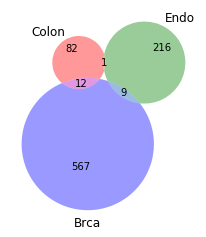

In [11]:
venn3([set(colon_genes), set(endo_genes), set(brca_genes)], 
      set_labels = ('Colon', 'Endo', 'Brca'))

In [12]:
print("The intersection of colon and endo: ", list(set(colon_genes).intersection(set(endo_genes))))
print("The intersection of colon and brca: ", list(set(colon_genes).intersection(set(brca_genes))))
print("The intersection of brca and endo: ", list(set(brca_genes).intersection(set(endo_genes))))

The intersection of colon and endo:  ['CBLB']
The intersection of colon and brca:  ['GABARAPL2', 'IDH3A', 'GDAP2', 'SUDS3', 'COQ8A', 'IDH3G', 'PRKAR1B', 'AIFM1', 'OXSM', 'C12orf57', 'COQ7', 'COX6C']
The intersection of brca and endo:  ['MAPRE2', 'PCSK1', 'SMOC1', 'STEAP4', 'PARVB', 'FTH1', 'GSTM1', 'ACTR8', 'PPDPF']


In [20]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
import gseapy as gp
from gseapy.plot import barplot, dotplot

In [22]:
only_colon = set(colon_genes).difference(set(endo_genes))
only_colon = set(only_colon).difference(set(brca_genes))
len(only_colon)

only_brca = set(brca_genes).difference(set(endo_genes))
only_brca = set(only_brca).difference(set(colon_genes))
len(only_brca)

only_endo = set(endo_genes).difference(set(brca_genes))
only_endo = set(only_endo).difference(set(colon_genes))
len(only_endo)

216

In [23]:
enr = gp.enrichr(gene_list = list(only_colon), description='up_in_colon', gene_sets='Reactome_2016', 
                       outdir='test/enrichr_kegg__pos_neg_corr')
enr.res2d

2020-06-08 09:57:44,266 Warning: No enrich terms using library Reactome_2016 when cutoff = 0.05


,Gene_set,Term,Overlap,P-value,Adjusted P-value,Old P-value,Old Adjusted P-value,Odds Ratio,Combined Score,Genes
0,Reactome_2016,Retrograde transport at the Trans-Golgi-Networ...,3/49,0.001068,1.0,0,0,14.932802,102.166288,COG3;STX6;RAB9A
1,Reactome_2016,Energy dependent regulation of mTOR by LKB1-AM...,2/28,0.005857,1.0,0,0,17.421603,89.547899,CAB39;MLST8
2,Reactome_2016,Cellular response to heat stress Homo sapiens ...,3/96,0.007217,1.0,0,0,7.621951,37.585809,NUP107;MLST8;HSPA12B
3,Reactome_2016,Mitotic Prometaphase Homo sapiens R-HSA-68877,3/107,0.009709,1.0,0,0,6.838386,31.693570,NUP107;RAD21;CSNK2A2
4,Reactome_2016,mTOR signalling Homo sapiens R-HSA-165159,2/39,0.011153,1.0,0,0,12.507817,56.235669,CAB39;MLST8
...,...,...,...,...,...,...,...,...,...,...
330,Reactome_2016,Metabolism of amino acids and derivatives Homo...,1/335,0.750417,1.0,0,0,0.728067,0.209047,GOT2
331,Reactome_2016,Infectious disease Homo sapiens R-HSA-5663205,1/348,0.763617,1.0,0,0,0.700869,0.189016,NUP107
332,Reactome_2016,Signaling by GPCR Homo sapiens R-HSA-372790,4/1293,0.784795,1.0,0,0,0.754532,0.182848,C3;RAP1A;ERBB3;MCF2L
333,Reactome_2016,GPCR ligand binding Homo sapiens R-HSA-500792,1/447,0.843905,1.0,0,0,0.545643,0.092604,C3


In [27]:
enr = gp.enrichr(gene_list = list(only_brca), description='up_in_colon', gene_sets='Reactome_2016', 
                       outdir='test/enrichr_kegg__pos_neg_corr')
enr.res2d.head(20)

,Gene_set,Term,Overlap,P-value,Adjusted P-value,Old P-value,Old Adjusted P-value,Odds Ratio,Combined Score,Genes
0,Reactome_2016,Mitochondrial translation Homo sapiens R-HSA-5...,66/90,3.796919e-83,5.809287e-80,0,0,25.867137,4909.074895,MRPS15;MRPS16;GFM2;MRPS12;MRPL38;MRPL39;MRPS10...
1,Reactome_2016,Mitochondrial translation termination Homo sap...,64/84,1.610094e-82,1.231722e-79,0,0,26.874948,5061.511644,MRPS15;MRPS16;GFM2;MRPS12;MRPL38;MRPL39;MRPS10...
2,Reactome_2016,Mitochondrial translation initiation Homo sapi...,63/84,1.892694e-80,9.652738e-78,0,0,26.455026,4856.317630,MRPS15;MRPS16;MRPS12;MRPL38;MRPL39;MRPS10;MRPL...
3,Reactome_2016,Mitochondrial translation elongation Homo sapi...,63/84,1.892694e-80,7.239553e-78,0,0,26.455026,4856.317630,MRPS15;MRPS16;MRPS12;MRPL38;MRPL39;MRPS10;MRPL...
4,Reactome_2016,Organelle biogenesis and maintenance Homo sapi...,72/326,2.084285e-43,6.377913e-41,0,0,7.790437,765.618720,MRPS15;MRPS16;GFM2;MRPS12;MRPL38;MRPL39;MRPS10...
5,Reactome_2016,The citric acid (TCA) cycle and respiratory el...,48/153,7.104833e-37,1.811732e-34,0,0,11.066155,921.089997,ATP5S;COX19;COX7B;UQCRB;ATP5A1;ATP5C1;ATP5J;DL...
6,Reactome_2016,"Respiratory electron transport, ATP synthesis ...",32/109,6.325246e-24,1.382518e-21,0,0,10.355484,553.164017,ATP5S;COX19;COX7B;UQCRB;ATP5A1;ATP5C1;ATP5J;ET...
7,Reactome_2016,Respiratory electron transport Homo sapiens R-...,25/88,1.392401e-18,2.662967e-16,0,0,10.020843,412.012004,COX19;COX7B;UQCRB;ETFA;ETFB;ECSIT;COX6A1;COX5B...
8,Reactome_2016,Mitochondrial protein import Homo sapiens R-HS...,20/54,1.058407e-17,1.799292e-15,0,0,13.064211,510.643175,HSPA9;DNAJC19;COX19;TIMM8A;TOMM40;TIMM9;ATP5A1...
9,Reactome_2016,Metabolism Homo sapiens R-HSA-1430728,118/1908,1.897211e-16,2.902733e-14,0,0,2.181477,78.971586,ATP5C1;ENO2;NUDT5;COX6A1;GLS;GCSH;PSMD9;ABHD10...


In [26]:
enr = gp.enrichr(gene_list = list(only_endo), description='up_in_colon', gene_sets='Reactome_2016', 
                       outdir='test/enrichr_kegg__pos_neg_corr')
enr.res2d

,Gene_set,Term,Overlap,P-value,Adjusted P-value,Old P-value,Old Adjusted P-value,Odds Ratio,Combined Score,Genes
0,Reactome_2016,Laminin interactions Homo sapiens R-HSA-3000157,6/23,1.281744e-07,0.000196,0,0,24.154589,383.330298,LAMA2;LAMC3;LAMA1;LAMB1;LAMC1;NID1
1,Reactome_2016,Axon guidance Homo sapiens R-HSA-422475,21/515,2.039402e-07,0.000156,0,0,3.775620,58.165089,PDGFRA;PRNP;LAMA1;LAMB1;AP2B1;ARPC5;LAMC1;RPS6...
2,Reactome_2016,Extracellular matrix organization Homo sapiens...,15/283,4.791302e-07,0.000244,0,0,4.907735,71.413886,COL28A1;LAMA2;LAMC3;LAMA1;MMP3;LAMB1;LAMC1;NID...
3,Reactome_2016,Developmental Biology Homo sapiens R-HSA-1266738,25/786,1.420606e-06,0.000543,0,0,2.945057,39.653505,SMARCD3;LAMA1;LAMC1;FOXO1;RPS6KA4;AKT2;GPC1;AP...
4,Reactome_2016,Collagen formation Homo sapiens R-HSA-1474290,7/85,3.759602e-05,0.011504,0,0,7.625272,77.690943,COL28A1;COL1A1;ADAMTS2;COL1A2;COL5A1;MMP3;COL6A3
...,...,...,...,...,...,...,...,...,...,...
602,Reactome_2016,Post-translational protein modification Homo s...,3/521,9.229476e-01,1.000000,0,0,0.533163,0.042750,ADAMTS2;MITF;GAS6
603,Reactome_2016,Generic Transcription Pathway Homo sapiens R-H...,5/812,9.414143e-01,1.000000,0,0,0.570151,0.034421,ZNF331;NOTCH2;SMARCD3;AKT2;GTF2H3
604,Reactome_2016,GPCR downstream signaling Homo sapiens R-HSA-3...,6/983,9.575112e-01,1.000000,0,0,0.565163,0.024538,PIK3CA;AKT2;PDE2A;ARHGEF1;SOS1;JAK1
605,Reactome_2016,Gene Expression Homo sapiens R-HSA-74160,10/1631,9.849200e-01,1.000000,0,0,0.567704,0.008626,ZNF331;NOTCH2;SMARCD3;AKT2;MAPKAPK2;SNRPE;ADAR...


In [13]:
brca = sig.drop(columns=['Difference_In_Median_Endo', 'P_Value_Endo','Difference_In_Median','P_Value'])
brca['cancer_type'] = "brca"
brca.columns = ['Difference_In_Median', 'P_Value','cancer_type']
brca.head()

endo = sig.drop(columns=['Difference_In_Median_Brca', 'P_Value_Brca','Difference_In_Median','P_Value'])
endo['cancer_type'] = "endo"
endo.columns = ['Difference_In_Median', 'P_Value','cancer_type']
endo.head()

colon = sig.drop(columns=['Difference_In_Median_Brca', 'P_Value_Brca','Difference_In_Median_Endo','P_Value_Endo'])
colon['cancer_type'] = "colon"
colon.head()

c_and_e = colon.append(endo)
df = c_and_e.append(brca)

df["comparison"] = df.index
df

,Difference_In_Median,P_Value,cancer_type,comparison
A2ML1,NaN,NaN,colon,A2ML1
AADAT,NaN,NaN,colon,AADAT
AAGAB,0.1390,0.039189,colon,AAGAB
AASDHPPT,NaN,NaN,colon,AASDHPPT
AATF,NaN,NaN,colon,AATF
...,...,...,...,...
ZNF654,0.4929,0.048872,brca,ZNF654
ZNF768,NaN,NaN,brca,ZNF768
ZNHIT3,NaN,NaN,brca,ZNHIT3
ZNRD1,NaN,NaN,brca,ZNRD1


In [14]:
get = df['comparison'].isin(brca_genes)
brca_df = df[get]
brca_df.head()

,Difference_In_Median,P_Value,cancer_type,comparison
AADAT,NaN,NaN,colon,AADAT
AATF,NaN,NaN,colon,AATF
ABHD10,NaN,NaN,colon,ABHD10
ABRACL,NaN,NaN,colon,ABRACL
ACADM,NaN,NaN,colon,ACADM


In [15]:
plot_utils.plotCircleHeatMap(brca_df, circle_var = 'P_Value', color_var='Difference_In_Median', y_axis= 'comparison', x_axis = 'cancer_type',
                   plot_width=700)

/Users/hannahboekweg/anaconda3/lib/python3.7/site-packages/plot_utils/__init__.py:40: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["size2"] = df[circle_var].apply(lambda x: -1*(np.log(x)))
/Users/hannahboekweg/anaconda3/lib/python3.7/site-packages/plot_utils/__init__.py:41: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['size'] = (df["size2"])*3


Loading BokehJS ...

In [16]:
get = df['comparison'].isin(endo_genes)
endo_df = df[get]
endo_df.head()

,Difference_In_Median,P_Value,cancer_type,comparison
ABL1,NaN,NaN,colon,ABL1
ACE,NaN,NaN,colon,ACE
ACP5,NaN,NaN,colon,ACP5
ACTR8,NaN,NaN,colon,ACTR8
ADAMTS2,NaN,NaN,colon,ADAMTS2


In [17]:
plot_utils.plotCircleHeatMap(endo_df, circle_var = 'P_Value', color_var='Difference_In_Median', y_axis= 'comparison', x_axis = 'cancer_type',
                   plot_width=700)

/Users/hannahboekweg/anaconda3/lib/python3.7/site-packages/plot_utils/__init__.py:40: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["size2"] = df[circle_var].apply(lambda x: -1*(np.log(x)))
/Users/hannahboekweg/anaconda3/lib/python3.7/site-packages/plot_utils/__init__.py:41: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['size'] = (df["size2"])*3


Loading BokehJS ...

In [18]:
get = df['comparison'].isin(colon_genes)
colon_df = df[get]
colon_df.head()

,Difference_In_Median,P_Value,cancer_type,comparison
ABHD16A,-0.1912,0.035684,colon,ABHD16A
ACOT9,-0.2495,0.029555,colon,ACOT9
AIFM1,-0.2925,0.045817,colon,AIFM1
APPL2,-0.2115,0.017324,colon,APPL2
ARL8B,-0.2673,0.041403,colon,ARL8B


In [19]:
plot_utils.plotCircleHeatMap(colon_df, circle_var = 'P_Value', color_var='Difference_In_Median', y_axis= 'comparison', x_axis = 'cancer_type',
                   plot_width=700)

/Users/hannahboekweg/anaconda3/lib/python3.7/site-packages/plot_utils/__init__.py:40: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["size2"] = df[circle_var].apply(lambda x: -1*(np.log(x)))
/Users/hannahboekweg/anaconda3/lib/python3.7/site-packages/plot_utils/__init__.py:41: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['size'] = (df["size2"])*3


Loading BokehJS ...